In [75]:
#importing all important libraries

import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
import pandas as pd
import os
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [76]:
# load the path of image folder

train_img = 'D:\\Assignment_Problem\\'
val_img = 'D:\\Assignment_Problem\\'

In [77]:
# Create empty lists for the images and labels
data = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(train_img, 'train', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(32,32))
            # Append the image and label to the lists
            data.append(img)
            labels.append(label)

#Convert List to numpy array

data = np.array(data)
labels = np.array(labels)

# Normalize the data
data = data / 255.0

# Save the arrays in NumPy format
np.save('x_train.npy', data)
np.save('y_train.npy', labels)


In [78]:
# Create empty lists for the images and labels
test_data = []
test_labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(val_img, 'val\\', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(32,32))
            # Append the image and label to the lists
            test_data.append(img)
            test_labels.append(label)

#Convert List to numpy array

test_data = np.array(test_data)
test_labels = np.array(test_labels)

# Normalize the data
test_data = test_data / 255.0

# Save the arrays in NumPy format
np.save('x_test.npy', test_data)
np.save('y_test.npy', test_labels)


In [79]:
#load the split data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [80]:
#Check the length of the split data
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1000
178
1000
178


In [81]:
x_train.shape

(1000, 32, 32)

In [87]:
model = Sequential([
 Flatten(),
 Dense(1024,input_shape=(1024,), activation='relu'),
 Dense(10, activation='softmax')
])

In [88]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 3s 42ms/step - loss: 1.3975 - accuracy: 0.6500 - val_loss: 0.4865 - val_accuracy: 0.8596
Epoch 2/10
32/32 [==============================] - 1s 30ms/step - loss: 0.2125 - accuracy: 0.9340 - val_loss: 0.3184 - val_accuracy: 0.8652
Epoch 3/10
32/32 [==============================] - 1s 31ms/step - loss: 0.1276 - accuracy: 0.9610 - val_loss: 0.5312 - val_accuracy: 0.8034
Epoch 4/10
32/32 [==============================] - 1s 35ms/step - loss: 0.0964 - accuracy: 0.9730 - val_loss: 0.2093 - val_accuracy: 0.9607
Epoch 5/10
32/32 [==============================] - 1s 31ms/step - loss: 0.0487 - accuracy: 0.9920 - val_loss: 0.2035 - val_accuracy: 0.9382
Epoch 6/10
32/32 [==============================] - 1s 31ms/step - loss: 0.0359 - accuracy: 0.9930 - val_loss: 0.1850 - val_accuracy: 0.9607
Epoch 7/10
32/32 [==============================] - 1s 33ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9438
Epoch 8/10
32

In [90]:
#After training, you can evaluate the model on the test data using the `evaluate` method
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.1824609339237213
Test accuracy: 0.9550561904907227


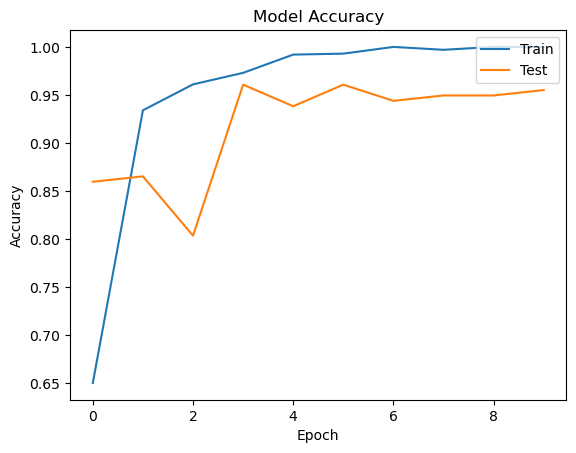

In [91]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

6/6 [==============================] - 0s 8ms/step
Predicated value is : 0
Predicated value is : 5
Predicated value is : 9


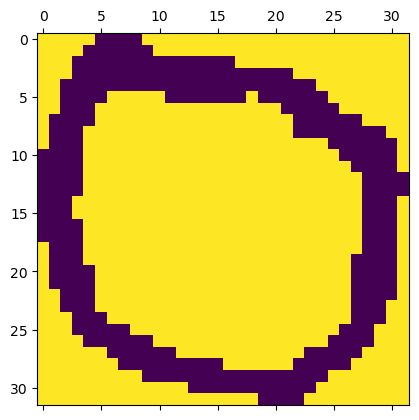

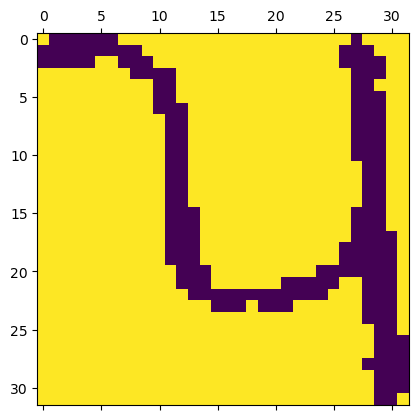

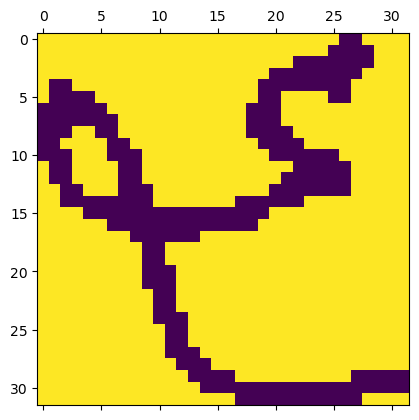

In [92]:
plt.matshow(x_test[0])
pred = model.predict(x_test)
pred[0]
# pred = np.argmax(pred[0])
print("Predicated value is :", np.argmax(pred[0]))

plt.matshow(x_test[88])
print("Predicated value is :", np.argmax(pred[88]))

plt.matshow(x_test[177])
print("Predicated value is :", np.argmax(pred[177]))